In [2]:
import pandas as pd
import plotly.express as px
from tqdm.notebook import tqdm

In [2]:
xlsx = pd.ExcelFile('Mordor LLC Emissions Calculations Report 08-12-2021.xlsx')

In [38]:
df = pd.DataFrame()
sheets = xlsx.sheet_names

for sheet in tqdm(sheets):
    if sheet != 'Notes':
        temp_df = pd.read_excel(xlsx, sheet)
        
        column_names = [col.strip()
                          .lower()
                          .replace(' ', '_')
                          .replace('(', '')
                          .replace(')', '') for col in temp_df.columns]
        
        temp_df.columns = column_names
        
        temp_df = temp_df[[col for col in column_names if 'unnamed' not in col]]
        
        temp_df['emission_group'] = sheet.lower().replace(' ', '_')
        
        df = pd.concat([df, temp_df], ignore_index=True)

df.date = pd.to_datetime(df.date)   
df.month = df.date.to_period('M').astype('str')
df.head()

/usr/local/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,date,site_location,quantity,source_unit,conversion,quantity_ghg_emissions,emissions_unit,emission_factor,emission_factor_unit,source_of_emission_factor,scope,category,emission_group,source_type,isic
0,01/01/2019,Rouen,83333.33333,Km,NaN,14036.666666,Kgco2e,"Use of passengers by car, average car (diesel)",Km,Defra,3,Business travel,business_travel,NaN,NaN
1,01/01/2019,Rouen,83333.33333,Km,NaN,3374.166667,Kgco2e,"Use of passengers by car, average car (diesel)",Km,Defra,3,Fuel and energy related services,business_travel,NaN,NaN
2,01/01/2019,Rouen,83333.33333,Km,NaN,14524.999999,Kgco2e,"Use of passengers by car, average car (petrol)",Km,Defra,3,Business travel,business_travel,NaN,NaN
3,01/01/2019,Rouen,83333.33333,Km,NaN,3984.166667,Kgco2e,"Use of passengers by car, average car (petrol)",Km,Defra,3,Fuel and energy related services,business_travel,NaN,NaN
4,01/01/2019,Oxford,12500.00000,Km,NaN,2105.500000,Kgco2e,"Use of passengers by car, average car (diesel)",Km,Defra,3,Business travel,business_travel,NaN,NaN


In [84]:
df['quantity_ghg_emissions'].sum() / 1000

286535.77556205954

In [4]:
df2 = pd.read_csv('data.csv')
df2.dtypes

/var/folders/rg/s50tlyns0bv_dxxslnjf9l8w0000gn/T/ipykernel_56450/2992130303.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('data.csv')


Unnamed: 0                     int64
date                          object
site_location                 object
quantity                     float64
source_unit                   object
conversion                    object
quantity_ghg_emissions       float64
emissions_unit                object
emission_factor               object
emission_factor_unit          object
source_of_emission_factor     object
scope                        float64
category                      object
emission_group                object
source_type                   object
isic                          object
dtype: object

In [44]:
(df.groupby('emission_group')['quantity_ghg_emissions'].sum() / 1000).sort_values(ascending=False)

emission_group
purchases             196245.692597
electricity            65023.604751
natural_gas            19540.189737
employee_commuting      2259.714238
fuel                    1677.763422
waste                   1199.933989
business_travel          549.470345
teleworking               27.417640
water                     11.988842
Name: quantity_ghg_emissions, dtype: float64

In [55]:
scope_summary = (df.groupby('scope')['quantity_ghg_emissions'].sum() / 1000).sort_values(ascending=False).to_frame().reset_index()
scope_summary['pc_ghg_emissions'] = scope_summary['quantity_ghg_emissions'] / scope_summary['quantity_ghg_emissions'].sum()
scope_summary

,scope,quantity_ghg_emissions,pc_ghg_emissions
0,3,205666.034920,0.717767
1,2,62163.946597,0.216950
2,1,18705.794045,0.065283


In [47]:
(df.groupby(['site_location', 'emission_group'])['quantity_ghg_emissions'].sum() / 1000).sort_values(ascending=False)

site_location              emission_group
Mordor innovative (2305)   purchases         111870.004602
Mordor polymask (2388)     purchases          26503.043944
Mordor intellipack (2370)  purchases          21628.449277
Mordor sharp (2410)        purchases          16677.633670
Plymouth, in,              electricity        14793.928025
                                                 ...      
Union city, ca             water                  0.002149
Malibu, ca                 water                  0.001214
Homewood, il               water                  0.000694
Lenoir, nc                 water                  0.000173
Atlanta, ga                water                  0.000173
Name: quantity_ghg_emissions, Length: 223, dtype: float64

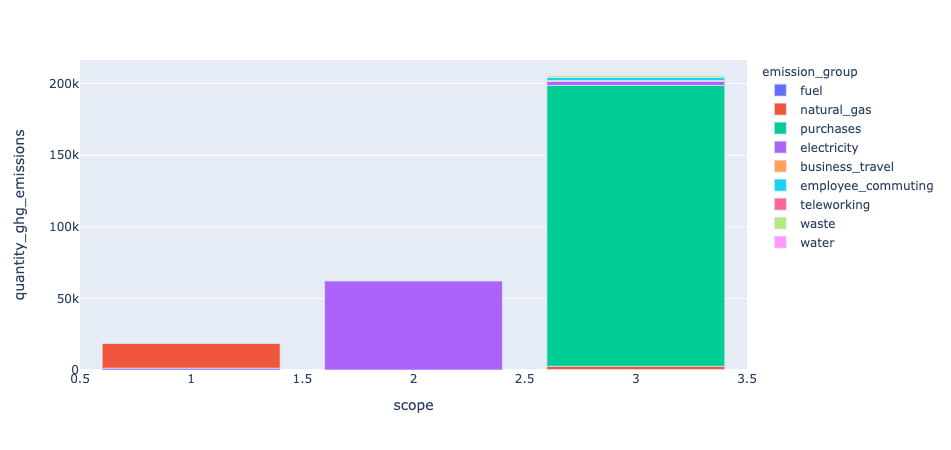

In [72]:
emissions_ts = (df.groupby(['scope', 'emission_group'])['quantity_ghg_emissions'].sum() / 1000).to_frame().reset_index()
px.bar(emissions_ts, x='scope', y='quantity_ghg_emissions', color='emission_group')

In [79]:
(df[df['emission_group'] == 'electricity'].groupby('emission_factor')['quantity_ghg_emissions'].sum() / 1000).sort_values(ascending=False)
df[df['emission_group'] == 'electricity'].head()

,date,site_location,quantity,source_unit,conversion,quantity_ghg_emissions,emissions_unit,emission_factor,emission_factor_unit,source_of_emission_factor,scope,category,emission_group,source_type,isic,month
168,2019-01-01,Rouen,12919.870968,Kwh,NaN,8125.292532,Kgco2e,"Market for electricity, medium voltage",Kwh,Ecoinvent,2,Purchased electricity,electricity,NaN,NaN,2019-01
169,2019-01-01,Rouen,12919.870968,Kwh,NaN,26.622946,Kgco2e,"Market for electricity, medium voltage",Kwh,Ecoinvent,3,Fuel and energy related services,electricity,NaN,NaN,2019-01
170,2019-01-01,"Kansas City, ms",30377.000000,Kwh,NaN,13396.275516,Kgco2e,Egrid 2018 for us state: az,Kwh,Egrid,2,Purchased electricity,electricity,NaN,NaN,2019-01
171,2019-01-01,"Kansas City, ms",30377.000000,Kwh,NaN,643.021225,Kgco2e,Egrid 2018 for us state: az,Kwh,Egrid,3,Fuel and energy related services,electricity,NaN,NaN,2019-01
172,2019-01-01,"Elkhorn, wi",24000.000000,Kwh,NaN,15199.844445,Kgco2e,Egrid 2018 for us state: wi,Kwh,Egrid,2,Purchased electricity,electricity,NaN,NaN,2019-01


In [81]:
df.isic.value_counts()

Restaurants and mobile food service activities                                                                                              30183
Short term accommodation activities                                                                                                         18101
Forging, pressing, stamping and roll-forming of metal; powder metallurgy                                                                     6204
Passenger air transport                                                                                                                      5558
Retail sale of automotive fuel in specialized stores                                                                                         5515
                                                                                                                                            ...  
Wholesale trade, except of motor vehicles and motorcycles                                                                   